# Livre blanc sur l'analyse des données et la BI
## Sarah Bouchikh et Emma Gadea

### Sommaire

#### Introduction
    Visualtion de la base de données
    Définition des données du fichier

#### I- Chapitre 1 : Description des données
    A-Typologie des données 
    B- Catégorie de données
    C-Transformation des données
    D-Les mesures de tendances centrale
    E-Les mesures de dispersion et de position 
    F-Représentation graphique de la distribution des données
    
#### II- Chapitre 2 : Exploration des données
    A-Comparer des variables
    B-Représenter graphiquement les relations entre les variables

#### III- Chapitre 3 : Modelisation des données
     A-Quel est le profil des collaborateurs qui vont quitter l'entreprise ?
     B-Pourquoi les collaborateurs quittent l'entreprise ?
    
#### IV- Conclusion


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image, ImageTk
import tkinter as tk

from matplotlib import image
%matplotlib inline


bidata = pd.read_csv('HR_training.csv', encoding='unicode_escape', engine='python', delimiter=';')

In [2]:
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1
3,9,"0,89",1,5,224,5,0,0,sales,low,1
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1


### DEFINITION DES DONNEES DU FICHIER 

- Id : Numéro du collaborateur
- Satisfaction level : Niveau de satisfaction des collaborateurs
- Last evaluation : Niveau de satisfaction des collaborateurs lors de l’évaluation précédente
- Number project : Nombre de projets portés par le collaborateur
- Average monthly hours : Nombre d’heures mensuel moyen d’un collaborateur
- Time spend company : Nombre d’années passées au sein de l’entreprise
- Work accident : Information qui précise si le collaborateur a subi un accident du travail
- Promotion last 5 years : Information qui précise si le collaborateur a été sujet à une promotion durant les 5 dernières années
- Job : Secteur dans lequel travaille le collaborateur
- Salary : Salaire du collaborateur (bas, moyen, haut)
- Left : Si le collaborateur a finalement quitté l’entreprise ou non

# I- Chapitre 1 : Description des données
## A-Typologie des données 

Il existe deux grandes catégories de données :

Les données qualitatives et les données quantitative elle même divisés en sous catégorie en voici la définition :

#### Les données quantitatives

Continues : Les données quantitatives continues sont des données subjectives mesurées sur une échelle continue, comme un degré de satisfaction ou une intensité d'émotion.
 
Discrètes : les données quantitatives discrètes sont à l’inverse non mesurables. Par exemple, ce sont le nombre d'enfants dans une famille, le nombre de produits achetés, le nombre de personnes dans une pièce.


#### Les données qualitatives

Ordinale: Une donnée qualitatives ordinale est une mesure numérique qui permet de classer les observations selon un ordre, mais sans échelle de mesure précise.

Nominale: Une donnée qualitatives nominale est une donnée qui est utilisée pour étiqueter ou catégoriser les observations, sans aucun ordre ou signification numérique.

## B- Catégorie de données

#### Variables à expliquer (dépendantes)

On considère les variables à expliquer comme étant des variables que l'ont peu prédire à l'aide des autres variables. On peut dire qu'elles sont corrélées. Par exemple on peut utiliser la droite de régression linéaire.

#### Variables explicatives (indépendantes)

On considère les variables explicatives comme étant des variables qui sont indépendantes les unes des autres.



##### Voici un tableau résumant la typologie de nos variables, ainsi que leur catégorie :


In [3]:
data = {'Nom des données':['id_colab','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','work_accident','promotion_last_5years','job','salary','left'],'Typologie des données':['Qualitative nominale','Quantitative continue','Quantitative continue','Quantitative continue','Quantitative continue','Quantitative continue','Qualitative nominale','Qualitative nominale','Qualitative nominale','Qualitative ordinale','Qualitative nominale'], 'Catégorie de données': ['Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable à expliquer']}
tableau_variables = pd.DataFrame(data)
tableau_variables


,Nom des données,Typologie des données,Catégorie de données
0,id_colab,Qualitative nominale,Variable explicative
1,satisfaction_level,Quantitative continue,Variable explicative
2,last_evaluation,Quantitative continue,Variable explicative
3,number_project,Quantitative continue,Variable explicative
4,average_montly_hours,Quantitative continue,Variable explicative
5,time_spend_company,Quantitative continue,Variable explicative
6,work_accident,Qualitative nominale,Variable explicative
7,promotion_last_5years,Qualitative nominale,Variable explicative
8,job,Qualitative nominale,Variable explicative
9,salary,Qualitative ordinale,Variable explicative


## C-Transformation des données

#### Données qualitatives en données quantitatives  

Nous allons transformer la variable 'left', que nous considérons comme une donnée qualitative continue, en donnée quantitative.

Pour cela, nous avons d'abord dupliqué la colonne 'left', puis nous avons changé les données par : 1='yes' et 0='no'.



In [4]:
bidata = bidata.assign(left_quanti=bidata['left'])
bidata['left_quanti'] = bidata['left_quanti'].map({1 : 'yes', 0 : 'no'})
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1,yes
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1,yes
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1,yes
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1,yes


#### Données quantitatives en données qualitatives

Nous allons transformer la variable 'average_montly_hours', que nous considérons comme quantitative nominale, en donnée qualitative.

Pour cela, nous avons d'abord dupliqué la colonne 'average_montly_hours', puis nous avons défini les contraintes relative à la dénomination des différentes données. Nous avons défini 3 catégories : 'low' pour les personnes travaillant moins de 110h/mois,'medium' pour les personnes travaillant entre 110h et 160h/mois et enfin 'high' pour les personnes travaillant plus de 160h/mois.


In [5]:
bidata = bidata.assign(average_montly_hours_quali=bidata['average_montly_hours'])
bins = [0, 110, 160, float('inf')]
labels = ['low', 'medium', 'high']
bidata['average_montly_hours_quali'] = pd.cut(bidata['average_montly_hours'], bins=bins, labels=labels)
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1,yes,medium
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1,yes,medium
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1,yes,medium
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1,yes,medium


In [6]:
bidata.salary.unique().tolist()

['low', 'medium', 'high']

## D-Les mesures de tendances centrale

Il existe 3 mesures de tendance centrale utilisées pour décrire les données d'une distribution statistique : 

#### La médiane 

C’est la valeur qui sépare la moitié inférieure de la moitié supérieure d'un ensemble (deux parties d’effectifs égaux).La médiane est utilisée pour mesurer la tendance centrale d'un ensemble de données. 

#### La moyenne

La moyenne est utilisée pour mesurer la tendance centrale d'un ensemble de données, elle peut également être utilisée pour identifier des tendances ou des changements dans les données au fil du temps en comparant les moyennes de différentes périodes ou groupes.

C'est la somme des données divisée par l’effectif global. C’est l'indicateur le plus simple pour résumer l'information fournie par un ensemble de données.

#### La mode

La mode est une mesure de tendance centrale utilisée pour décrire les données d'une distribution statistique. C'est la valeur qui apparaît le plus fréquemment dans un ensemble de données.Elle est souvent utilisée pour décrire les données qualitatives ou pour identifier les éléments les plus fréquents dans un ensemble de données. 

Afin de rendre notre livrable plus conscis nous avons decidé de ne pas interpréter toutes les variables.

In [7]:
#Mediane
mediane_bidata = bidata.median()
mediane_bidata
##on ne tient pas compte de id_colab et left car insignifiant

C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\3573655911.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediane_bidata = bidata.median()


id_colab                 7500.0
number_project              4.0
average_montly_hours      199.0
time_spend_company          3.0
work_accident               0.0
promotion_last_5years       0.0
left                        0.0
dtype: float64

##### D'après le résultat, nous obtenons une médiane de 4 pour "number_project" et une médiane de 199 pour "average_montly_hours" . Nous pouvons déduire que 50% des employés intérrogés on été affectés à plus de 4 projets et 50% on été affectés à moins de 4 projets. Nous pouvons également déduire que plus de moitié ont travaillés plus de 199h et l'autre moitié moins de 199h.

In [8]:
#Moyenne
average_bidata = bidata.mean()
average_bidata

##on ne tient pas compte de id_colab et left car insignifiant

C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\3805715750.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_bidata = bidata.mean()


id_colab                 7492.237489
number_project              3.803303
average_montly_hours      200.812655
time_spend_company          3.507213
work_accident               0.147050
promotion_last_5years       0.020098
left                        0.237688
dtype: float64

##### D'après le résultat, nous obtenons une moyenne de 3.8 pour "number_project" et une moyenne de 200.8 pour "average_montly_hours". Nous pouvons donc déduire que en moyenne les employés ont environ 4 projets et qu'ils travaillent en moyenne 200h/mois.

In [9]:
#Mode
from scipy import stats

mode_bidata = bidata.mode()
print(mode_bidata.loc[0])
##on ne tient pas compte de id_colab car insignifiant

id_colab                          4
satisfaction_level              0,1
last_evaluation                0,54
number_project                  4.0
average_montly_hours          156.0
time_spend_company              3.0
work_accident                   0.0
promotion_last_5years           0.0
job                           sales
salary                          low
left                            0.0
left_quanti                      no
average_montly_hours_quali     high
Name: 0, dtype: object


##### D'après le resultat, le mode pour number_project est de 4 et 156 pour average_montly_hours. Ce qui signifie que les employés ont tendance à etre affecté à 4 projets et qu'ils ont tendance à travailler 156h/mois.

## E-Les mesures de dispersion et de position 

Les mesures de dispersion décrivent la variabilité ou la répartition des valeurs d'une variable statistique dans un ensemble de données. Les mesures les plus courantes de dispersion sont : 

#### L'écart-type

L'écart-type est une mesure de dispersion des données autour de la moyenne. Plus l'écart-type est faible, plus la population est homogène et à l'inverse plus il est élevé plus elle est hétérogène. Il est particulièrement utile pour identifier les données aberrantes, qui peuvent avoir un impact important sur les résultats globaux. Il est également utilisé dans les calculs statistiques tels que la construction d'intervalles de confiance, le test d'hypothèse et l'analyse de la variance.

#### La variance

La variance mesure la moyenne des distances au carré des valeurs de la variable par rapport à la moyenne de cette variable. Elle est également utilisée dans les calculs statistiques tels que la construction d'intervalles de confiance, le test d'hypothèse et l'analyse de la variance. Elle est utilisée pour mesurer la risque dans l'investissement, pour identifier la volatilité d'un actif financier.

#### La fréquence 

La fréquence désigne le nombre de fois où une valeur ou un événement se produit dans un ensemble de données. Elle peut être exprimée sous forme de nombre absolu ou de pourcentage (c'est-à-dire en rapport à la taille totale de l'ensemble de données).

C'est un outil clé pour l'analyse de données descriptives, qui permet de comprendre la répartition des valeurs dans un ensemble de données.

#### L'étendue (minimum,maximum)

L'étendue statistique est un concept utilisé pour mesurer la variabilité ou la dispersion des données dans un ensemble de données. Elle est généralement utilisée pour décrire la dispersion des données autour de la moyenne et peut être utilisée pour comparer la variabilité entre différents ensembles de données.

#### Le percentile

Un percentile est un concept statistique qui décrit la valeur en dessous de laquelle se trouve un certain pourcentage de valeurs dans un ensemble de données. Par exemple, si un élève a obtenu un score de 75ème percentile sur un test, cela signifie qu'il a obtenu un score supérieur à 75% des autres élèves. Les percentiles peuvent être utilisés pour donner une idée de la distribution des données et pour comparer les performances d'une personne à celles des autres dans un groupe.



In [10]:
#Ecart-type
std_all = bidata.std()
std_all
##on ne tient pas compte de id_colab et left car insignifiant

C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\3234764835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_all = bidata.std()


id_colab                 4331.355967
number_project              1.230464
average_montly_hours       49.775706
time_spend_company          1.480360
work_accident               0.354173
promotion_last_5years       0.140341
left                        0.425688
dtype: float64

##### D'après le résultat, l'écart-type de "number_project" est de 1 donc plutôt homègene et est de 49 pour "average_montly_hours" donc plus hétérogène. Nous pouvons donc déduire que les employés sont affectés en générale au même nombre de projet, mais que leurs temps passé au travail est généralement différents pour chacun d'entre eux.

In [11]:
#Variance
var_all = bidata.var()
var_all
##on ne tient pas compte de id_colab et left car insignifiant

C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\3545053567.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_all = bidata.var()


id_colab                 1.876064e+07
number_project           1.514043e+00
average_montly_hours     2.477621e+03
time_spend_company       2.191465e+00
work_accident            1.254388e-01
promotion_last_5years    1.969555e-02
left                     1.812103e-01
dtype: float64

##### D'après le resultat, la variance de number_project est de 1.5 c'est à dire que la dispertion est proche de la moyenne alors que la variance deaverage_montly_hours est de 2.4 donc plus écarté de la moyenne. 

In [12]:
# Fréquence
##on ne tient pas compte de id_colab car insignifiant donc nous n'avons pas calculé sa fréquence.
freq_satisfaction_level = bidata['satisfaction_level'].value_counts()
freq_satisfaction_level

0,1     261
0,11    222
0,77    177
0,74    171
0,82    167
       ... 
0,3      22
0,26     22
0,33     21
0,12     20
0,27     19
Name: satisfaction_level, Length: 92, dtype: int64

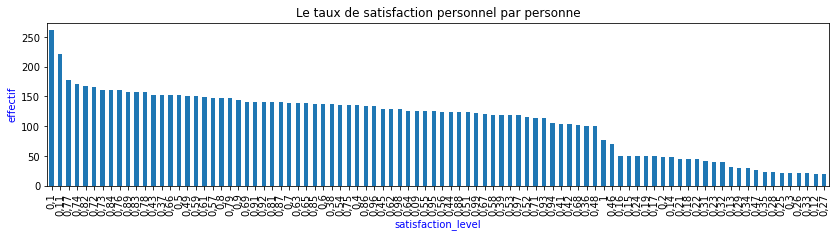

In [13]:
freq_satisfaction_level.plot(kind='bar')
plt.title("Le taux de satisfaction personnel par personne")
plt.xlabel('satisfaction_level', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.gcf().set_size_inches(14, 3)
plt.show()

##### D'après le resultat, nous pouvons constater que 261 personnes ont répondu 0.1 de taux de satisfaction.

In [14]:
freq_last_evaluation = bidata['last_evaluation'].value_counts()
freq_last_evaluation

0,54    248
0,55    236
0,5     233
0,51    227
0,53    225
       ... 
0,38     33
0,42     32
0,43     31
0,44     29
0,36     16
Name: last_evaluation, Length: 65, dtype: int64

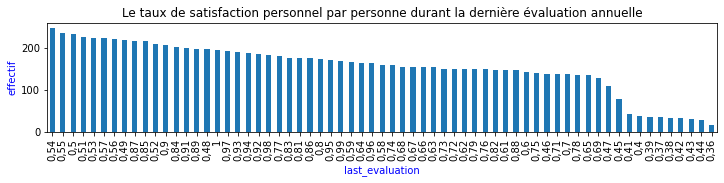

In [15]:
freq_last_evaluation.plot(kind='bar')
plt.title("Le taux de satisfaction personnel par personne durant la dernière évaluation annuelle")
plt.xlabel('last_evaluation', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.gcf().set_size_inches(12, 2)

plt.show()

##### D'après le résultat, nous pouvons constater que l'année dernière 248 personnes (effectif le plus élévé) ont répondu 0.54 de taux de satisfaction. Seulement 16 personnes ont répondu 0.36.

In [16]:
freq_number_project = bidata['number_project'].value_counts()
freq_number_project

4    2938
3    2739
5    1830
2    1582
6     790
7     172
Name: number_project, dtype: int64

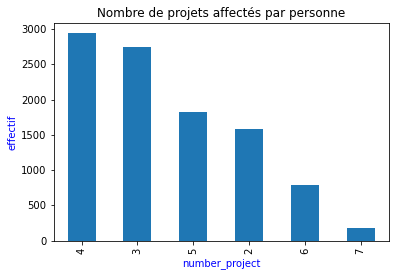

In [17]:
freq_number_project.plot(kind='bar')
plt.title("Nombre de projets affectés par personne")
plt.xlabel('number_project', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le resulat, 2938 employés ont été affectés à 4 projets et 172 à 7 projets.

In [18]:
freq_average_montly_hours = bidata['average_montly_hours'].value_counts()
freq_average_montly_hours

156    102
149    101
140     99
151     98
159     93
      ... 
288      5
297      5
96       5
299      4
303      3
Name: average_montly_hours, Length: 215, dtype: int64

In [19]:
freq_average_montly_hours_quali = bidata['average_montly_hours_quali'].value_counts()
freq_average_montly_hours_quali

high      7138
medium    2751
low        162
Name: average_montly_hours_quali, dtype: int64

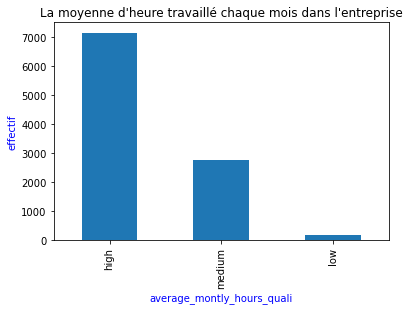

In [20]:
#Les colonnes "average_montly_hours" et "average_montly_hours_quali" étant les même, il est plus simple d'utiliser "average_montly_hours_quali" pour faire le graphique.
#Il y a moins de données, donc le graphique est plus visible et plus compréhensible. Mais ce sont les même données.
freq_average_montly_hours_quali.plot(kind='bar')
plt.title("La moyenne d'heure travaillé chaque mois dans l'entreprise")
plt.xlabel('average_montly_hours_quali', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, 7238 employés ont travaillés en moyenne plus de 160h/mois et seulement 162 ont travaillés moins de 110h/mois

In [21]:
freq_time_spend_company = bidata['time_spend_company'].value_counts()
freq_time_spend_company

3     4311
2     2174
4     1713
5      976
6      483
10     155
7      122
8      117
Name: time_spend_company, dtype: int64

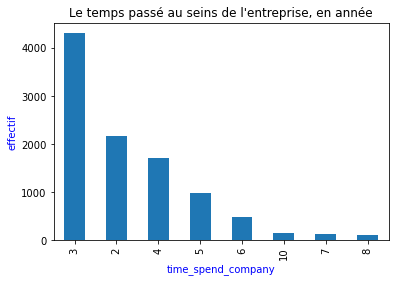

In [22]:
freq_time_spend_company.plot(kind='bar')
plt.title("Le temps passé au seins de l'entreprise, en année")
plt.xlabel('time_spend_company', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le resultat, 4311 employés sont là depuis 3 ans. Pour la minorité d'entre eux soit 117 employés, depuis 8 ans.

In [23]:
freq_work_accident = bidata['work_accident'].value_counts()
freq_work_accident

0    8573
1    1478
Name: work_accident, dtype: int64

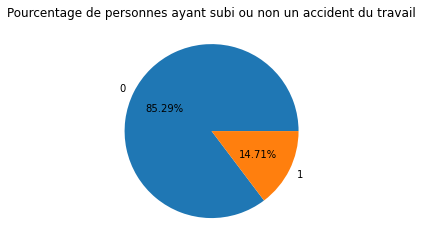

In [24]:
freq_work_accident.plot(kind='pie', autopct='%1.2f%%')
plt.title('Pourcentage de personnes ayant subi ou non un accident du travail')
plt.ylabel('')
plt.show()

##### D'après le résultat, 8573 ou 85% des employés n'ont pas subi d'accident de travail et 1478 ou 14% ont subi un accident du travail.

In [25]:
freq_promotion_last_5years = bidata['promotion_last_5years'].value_counts()
freq_promotion_last_5years

0    9849
1     202
Name: promotion_last_5years, dtype: int64

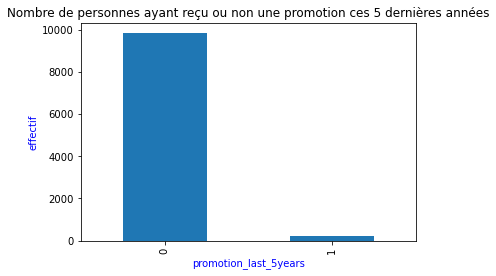

In [26]:
freq_promotion_last_5years.plot(kind='bar')
plt.title('Nombre de personnes ayant reçu ou non une promotion ces 5 dernières années')
plt.xlabel('promotion_last_5years', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, seulement 202 employés ont eu une promotion lors de ces 5 dernières années.

In [27]:
freq_job = bidata['job'].value_counts()
freq_job

sales          2816
technical      1808
support        1468
IT              852
product_mng     586
marketing       583
RandD           509
accounting      502
hr              494
management      433
Name: job, dtype: int64

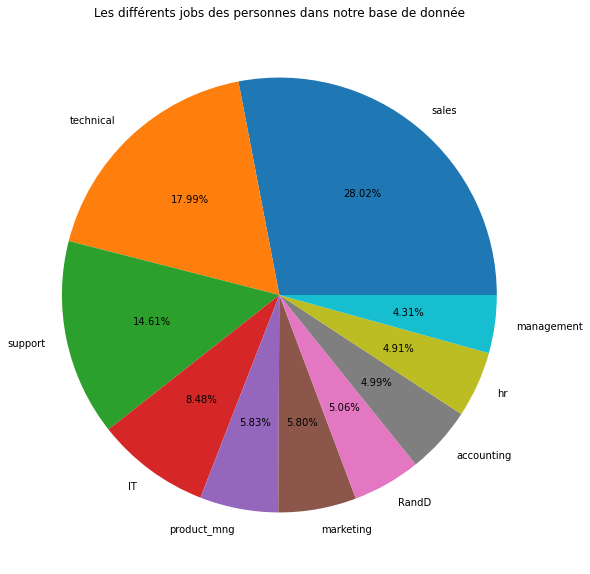

In [28]:
freq_job.plot(kind='pie', autopct='%1.2f%%')
plt.title('Les différents jobs des personnes dans notre base de donnée')
plt.ylabel('')
plt.gcf().set_size_inches(10, 10)

plt.show()

##### D'après le résultat, 2816 employés soit 28% ont un poste en vente, et seulement 433 soit 4.3% ont un poste dans le domaine du management.

In [29]:
freq_salary = bidata['salary'].value_counts()
freq_salary

low       4899
medium    4324
high       828
Name: salary, dtype: int64

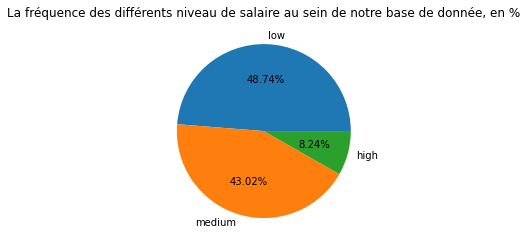

In [30]:
freq_salary.plot(kind='pie', autopct='%1.2f%%')
plt.title('La fréquence des différents niveau de salaire au sein de notre base de donnée, en %')
plt.ylabel('')
plt.show()

##### D'après le résultat, 4899 soit 48.7% des employés ont un salaire faible et 828 soit 8.2% ont un salaire élevé.

In [31]:
freq_left = bidata['left'].value_counts()
freq_left
#Les colonnes "left_quanti" et "left" ont les même données. La fréquence sera donc la même. Yes=1 et No=0.

0    7662
1    2389
Name: left, dtype: int64

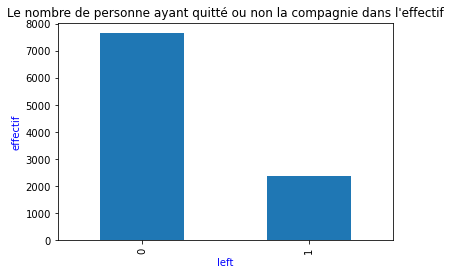

In [32]:
freq_left.plot(kind='bar')
plt.title("Le nombre de personne ayant quitté ou non la compagnie dans l'effectif")
plt.xlabel('left', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, 7662 employés sont restés dans l'entreprise et 2389 sont partis.

In [33]:
#Etendue min
#id_colab,job,salary,left_quanti,average_montly_hours_quali sont insignifiant.
min_all = bidata.min()
min_all

id_colab                         4
satisfaction_level            0,09
last_evaluation               0,36
number_project                   2
average_montly_hours            96
time_spend_company               2
work_accident                    0
promotion_last_5years            0
job                             IT
salary                        high
left                             0
left_quanti                     no
average_montly_hours_quali     low
dtype: object

##### D'après le résultat, le minimum de projets affecté est de 2 et le minimum d'heures effectués par mois est de 96h.

In [34]:
#Etendue max
#id_colab,job,salary,left_quanti,average_montly_hours_quali sont insignifiant.
max_all = bidata.max()
max_all

id_colab                          14998
satisfaction_level                    1
last_evaluation                       1
number_project                        7
average_montly_hours                310
time_spend_company                   10
work_accident                         1
promotion_last_5years                 1
job                           technical
salary                           medium
left                                  1
left_quanti                         yes
average_montly_hours_quali         high
dtype: object

##### D'après le résultat, le nombre maximum projets affecté est de 7 et le maximum d'heures effectués par mois est de 310h.

In [35]:
#Percentile
#id_colab est insignifiant
percentiles_all = bidata.quantile([0.25, 0.5, 0.75])
percentiles_all

,id_colab,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
0.25,3750.5,3.0,156.0,3.0,0.0,0.0,0.0
0.50,7500.0,4.0,199.0,3.0,0.0,0.0,0.0
0.75,11249.0,5.0,245.0,4.0,0.0,0.0,0.0


##### D'après le résultat, 25% des employés ont été affectés à 3 projets et 75% à 5 projets. Concernant les heures effectués par mois 25% des employés travaillent 156h/mois et 75% travaillent 245h/mois.

##### Voici un tableau regroupant l'ensemble des KPIs ci dessus:

In [36]:
kpi = bidata.describe().applymap('{:.2f}'.format)
kpi
#On ne tient pas compte de id_colab et left car insignifiant.

,id_colab,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,10051.00,10051.00,10051.00,10051.00,10051.00,10051.00,10051.00
mean,7492.24,3.80,200.81,3.51,0.15,0.02,0.24
std,4331.36,1.23,49.78,1.48,0.35,0.14,0.43
min,4.00,2.00,96.00,2.00,0.00,0.00,0.00
25%,3750.50,3.00,156.00,3.00,0.00,0.00,0.00
50%,7500.00,4.00,199.00,3.00,0.00,0.00,0.00
75%,11249.00,5.00,245.00,4.00,0.00,0.00,0.00
max,14998.00,7.00,310.00,10.00,1.00,1.00,1.00


In [37]:
bidata.describe(include=[object])
     

,satisfaction_level,last_evaluation,job,salary,left_quanti
count,10051,10051,10051,10051,10051
unique,92,65,10,3,2
top,"0,1","0,54",sales,low,no
freq,261,248,2816,4899,7662


## F-Représentation graphique de la distribution des données

In [38]:
#Rappelons ici à quoi notre dataframe "bidata" ressemble en affichant seulement les 5premières lignes.
bidata.head()

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium


Nous allons maintenant crée graphiquement ces données afin de donner un aperçu plus claire de celles-ci

<AxesSubplot:xlabel='number_project', ylabel='Count'>

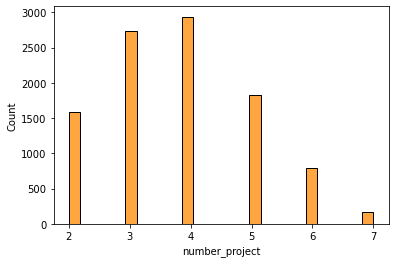

In [39]:
sns.histplot(bidata["number_project"],color= '#ff8800')

Sur ce graphique nous pouvons visualiser le nombre de projets attribués à chaque salarié.

Nous pouvons constater que en général les salariés sont affectés à 4 projets

<AxesSubplot:xlabel='work_accident', ylabel='Count'>

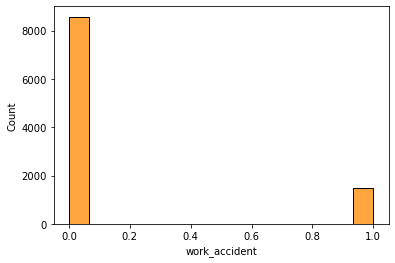

In [40]:
sns.histplot(bidata["work_accident"],color= '#ff8800')

Sur ce graphique, nous pouvons visualiser le nombre d'accidents de travail sur l'effectif de l'entreprise.

Nous pouvons constater sur ce graphique qu'il à peu d'accidents de travail

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

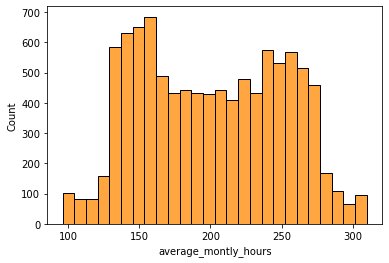

In [41]:
sns.histplot(bidata["average_montly_hours"],color= '#ff8800')

Sur ce graphique, nous pouvons visualiser le nombre d'heure travaillés moyen par mois des salariés.

Nous pouvons constater que beaucoup travaillent environ 150h/mois et 250h/mois.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

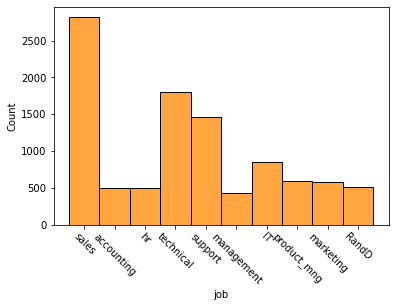

In [42]:
sns.histplot(bidata["job"],color= '#ff8800')
plt.xticks(rotation=-45)

Ce graphique nous montre la répartition des métiers dans l'entreprise

Nous pouvons constater que le domaine des ventes est le plus représenté.

<AxesSubplot:xlabel='salary', ylabel='Count'>

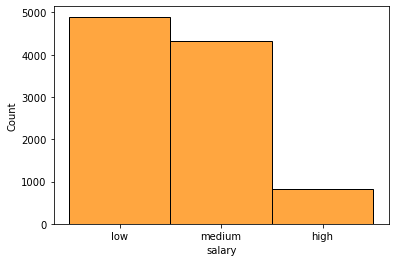

In [43]:
sns.histplot(bidata["salary"],color= '#ff8800')

Ici le graphique nous montre la variation des salaires dans l'entreprise.

Nous pouvons constater que la plupart des salariés ont un salaire bas et moyen et très peu ont un salaire élevé.

Voici un tableau de bord Power bi qui nous montre le profil des salariés de notre entreprise (sans prendre en compte les départs)

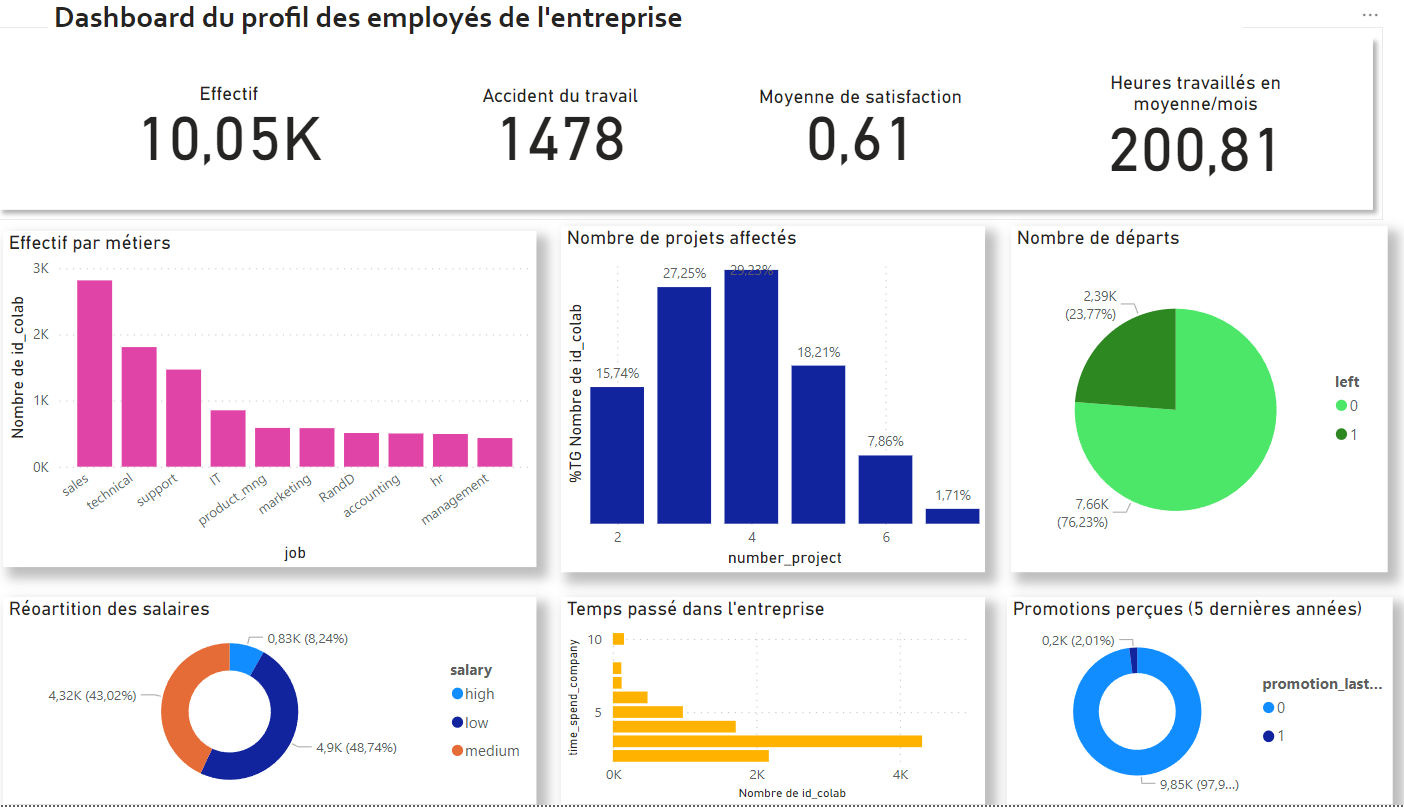

In [44]:
imdashboardglo = Image.open('Dashboard effectif global.png')
imdashboardglo

##### Ces graphiques sont un avant goût du prochain chapitre dans lequel nous allons explorer les données grâce à des analyses multivariés.

# II- Chapitre 2 : Explorer les données

Dans ce chapitre nous allons comparer les variables entre elles afin de pouvoir interpreter des résultats. Cela vas nous permettre de mieux comprendre nos données et de comprendre ce qui pousse les employés à quitter l'entreprise.

### A-Comparer des variables
#### Comparaison de nos variables numériques

Voici un tableau de corrélation de nos variables numérique.Le tableau de corrélation est un outil statistique qui montre la force et la direction de la relation entre deux ou plusieurs variables quantitatives. Il peut être utilisé pour identifier les variables qui sont fortement corrélées et qui peuvent influencer les résultats d'une analyse.

Voici une représentation graphique via une heatmap de ce tableau de corrélation qui nous permet d'avoir une meilleur visualisation des résultats : 

In [45]:
#Pour avoir une meilleure visiblité sur la correlation entre la variable "left" et toutes les autres, 
#nous avons décidé de transformer les variables "salary" et "job".
bidata = bidata.assign(salary1=bidata['salary'])
bidata['salary1'] = bidata['salary1'].map({'low' : 1, 'medium' : 2, 'high' : 3 })
bidata = bidata.assign(job1=bidata['job'])
bidata['job1'] = bidata['job1'].map({'sales' : 1, 'technical' : 2, 'support' : 3 , 'IT' : 4, 'product_mng' : 5, 'marketing' : 6, 'RandD' : 7, 'accounting' : 8, 'hr' : 9, 'management' : 10 })
bidata.head()

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali,salary1,job1
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high,1,1
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium,1,1
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high,1,1
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high,1,1
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium,1,1


In [46]:
bidata_numericvalues = bidata[bidata.columns[1:]]
corr_matrix = bidata_numericvalues.corr(method='spearman')
corr_matrix

,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left,salary1,job1
number_project,1.000000,0.400247,0.250878,0.005150,-0.000919,-0.004792,0.004128,-0.010735
average_montly_hours,0.400247,1.000000,0.168228,-0.013169,-0.008891,0.056638,0.008204,-0.013683
time_spend_company,0.250878,0.168228,1.000000,-0.022982,0.033373,0.270494,0.002318,0.009990
work_accident,0.005150,-0.013169,-0.022982,1.000000,0.032622,-0.155293,0.012831,0.008124
promotion_last_5years,-0.000919,-0.008891,0.033373,0.032622,1.000000,-0.061647,0.098135,0.046947
left,-0.004792,0.056638,0.270494,-0.155293,-0.061647,1.000000,-0.149190,-0.018272
salary1,0.004128,0.008204,0.002318,0.012831,0.098135,-0.149190,1.000000,0.066947
job1,-0.010735,-0.013683,0.009990,0.008124,0.046947,-0.018272,0.066947,1.000000


<function heatmap at 0x00000157B43F4B80>


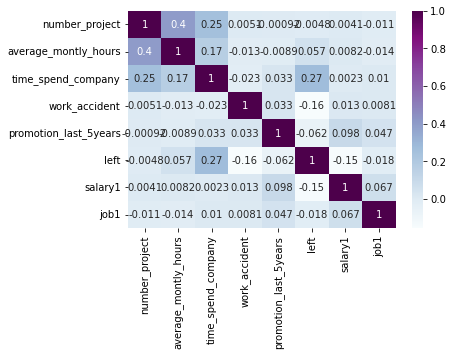

In [47]:
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
print(sns.heatmap)

Interprétation du tableau de corrélation : 



#### Comparaison de nos variables qualitatives et test Chi2

Afin de pouvoir comparer nos variables qualitatives nous allons utiliser la méthode du Chi2. En effet, cette méthode permet d'évaluer si une différence observée entre les fréquences observées et les fréquences théoriques est statistiquement significative.

Le test du chi2 est souvent utilisé dans les sciences sociales et la médecine pour déterminer si une association statistique existe entre deux variables catégoriques, telles que le sexe et une maladie, ou l'âge et un comportement de consommation.

L'intérêt du test du Khi² est de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence. 

##### Pour notre étude, nous allons comparer la variable "left" avec le reste des variables qualitatives.


##### ces deux liens nous ont aidé pour la compréhention du Test Chi-2 
- https://asardell.github.io/statistique-python/
- https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

On pose les hypothèses de départ :
- H0 : Variables indépendantes si p-value > 5%
- H1 : Variables non indépendantes si p-value < 5%

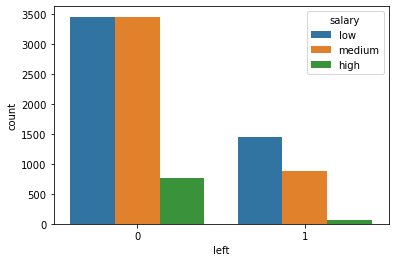

In [48]:
# diagramme à barre de la variable
sns.countplot(x='left', hue='salary', data=bidata);

In [49]:
# Hypothèses pour cette comparaison
# H0 : la proportion de personne qui démissionne de l'entreprise est indépendante du salaire
# H1 : la proportion de personne qui démissionne de l'entreprise est corrélée au salaire

In [50]:
#tableau de contingence entre les variables 'left' et 'salary'
df_ls = pd.crosstab(bidata['left'], bidata['salary'])
df_ls

salary,high,low,medium
left,,,
0,770,3452,3440
1,58,1447,884


In [51]:
# calcule de p-value 
from scipy.stats import chi2_contingency
from scipy import stats
stats.chi2_contingency(df_ls, correction = True)

(244.7515811714342,
 7.126387442442354e-54,
 2,
 array([[ 631.19450801, 3734.56750572, 3296.23798627],
        [ 196.80549199, 1164.43249428, 1027.76201373]]))

p-value = 7.126387442442354e-54 > 5% . Donc on ne peut pas rejeter l'hypothèse nulle, selon laquelle la proportion de personne démissionne de l'entreprise est indépendante du salaire perçu. On admet donc que le salaire n'est pas l'une des causes principales du départ des employées. 

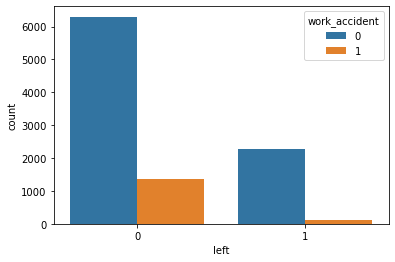

In [52]:
# diagramme à barre de la variable
sns.countplot(x='left', hue='work_accident', data=bidata);

In [53]:
#tableau de contingence entre les variables 'left' et 'work_accident'
df_lwa = pd.crosstab(bidata['left'], bidata['work_accident'])
df_lwa

work_accident,0,1
left,,
0,6300,1362
1,2273,116


In [54]:
stats.chi2_contingency(df_lwa, correction = True)

(241.3614508514171,
 1.9854177373977723e-54,
 1,
 array([[6535.30255696, 1126.69744304],
        [2037.69744304,  351.30255696]]))

p_value =  1.9854177373977723e-54 < 5%. Ici on rejete l'hypothèse nulle avec un niveau de confiance de 95%. L'hypothèse alternative H1 est plus probable. On peut donc en déduire que ces deux variables sont corrélées.

In [55]:
#tableau de contingence entre les variables 'left' et 'promotion_last_5years'
df_lp = pd.crosstab(bidata['left'], bidata['promotion_last_5years'])
df_lp

promotion_last_5years,0,1
left,,
0,7471,191
1,2378,11


In [56]:
stats.chi2_contingency(df_lp, correction = True)

(37.17230396350546,
 1.0813878149068868e-09,
 1,
 array([[7508.01293404,  153.98706596],
        [2340.98706596,   48.01293404]]))

p_value = 1.0813878149068868e-09 < 5%. Ici on rejete l'hypothèse nulle avec un niveau de confiance de 95%. L'hypothèse alternative H1 est plus probable. On peut donc en déduire que ces deux variables sont corrélées.

In [57]:
#tableau de contingence entre les variables 'left' et 'job'
df_lj = pd.crosstab(bidata['left'], bidata['job'])
df_lj

job,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,659,434,352,350,372,447,458,2137,1096,1357
1,193,75,150,144,61,136,128,679,372,451


In [58]:
stats.chi2_contingency(df_lj, correction = True)

(68.9793002394624,
 2.4132148162218698e-11,
 9,
 array([[ 649.49000099,  388.01691374,  382.68072829,  376.58223062,
          330.08118595,  444.42801711,  446.71495374, 2146.671177  ,
         1119.07432096, 1378.26047159],
        [ 202.50999901,  120.98308626,  119.31927171,  117.41776938,
          102.91881405,  138.57198289,  139.28504626,  669.328823  ,
          348.92567904,  429.73952841]]))

p_value = 2.4132148162218698e-11 < 5%. Ici on rejete l'hypothèse nulle avec un niveau de confiance de 95%. L'hypothèse alternative H1 est plus probable. On peut donc en déduire que ces deux variables sont corrélées.

#### Comparaison de nos variables quantitatives et qualitatives avec la méthode ANOVA

Afin de comparer des variables quantitatives et qualitatives entres elles nous allons utiliser la méthode ANOVA.Cette méthode sert à évaluer l'effet d'une ou plusieurs variables explicatives sur une variable réponse. Elle permet de déterminer si les différences observées dans la variable réponse peuvent être attribuées à des différences dans les valeurs des variables explicatives ou sont le résultat d'une variation aléatoire. Cette méthode est souvent utilisée en analyse statistique pour des expériences scientifiques, en marketing pour des tests d'hypothèses sur les produits ou les segments de marché, et en économie pour des études de marché.

#### Comment interpréter un tableau ANOVA : 

Le tableau ANOVA est le résultat final d'une succession de formules de calcul complexes. Il présente trois types de données numériques exploitables :

Les degrés de liberté ou ddl.

Le résultat noté F.

La signification notée p : cette valeur, obtenue grâce aux données ddl et F, constitue le rapport de variance qui confirme ou qui infirme l'hypothèse testée. Si la valeur de p est inférieure à 0,05, l'hypothèse nulle, selon laquelle les moyennes sont égales, peut être vraisemblablement rejetée. C'est-à-dire que les variables qualitatives ont un effet significatif sur la variable quantitative : une moyenne au moins se distingue dans une large mesure au sein de l'échantillon.

Nous avons ici pris des variables qu'il nous semblais logique d'étudier ensembles : 

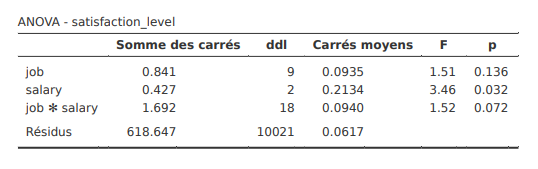

In [59]:
#Tableau méthode anova en fonction de satisfaction_level en corrélation avec job et salary (Tableau fait avec jamovi)
imganova1 = Image.open('anova.png')
imganova1

Ici nous pouvons constater, que p est supérieur à 0.05 ce qui signifie que le métiers ainsi que le salaire qui lui est attribués à une importance sur la satisfaction des employés.

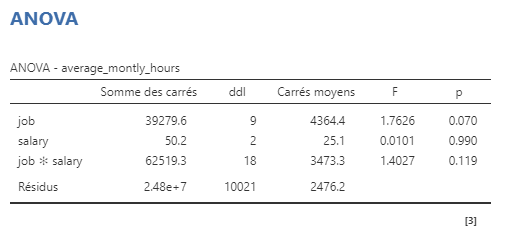

In [60]:
#Tableau méthode anova en fonction de average_monthly_hours en corrélation avec job et salary (Tableau fait avec jamovi)
imganova2 = Image.open('anova2.png')
imganova2

Ici nous pouvons constater, que p est largement supérieur à 0.05 nous pouvons donc déduire que le  métier et le salaire qui lui est attribué à un impacte sur le temp travaillé dans l'entreprise par mois. On constate également que le salaire impacte plus que le métiers en lui même.

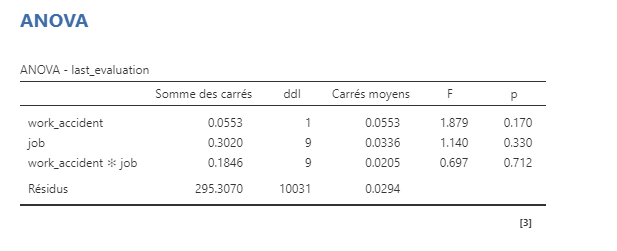

In [61]:
#Tableau méthode anova en fonction de last_evalutation en corrélation avec job et work accident (Tableau fait avec jamovi)
imganova3 = Image.open('anova3.png')
imganova3

Ici nous pouvons constater, que p est également supérieur à 0.05 et que par conclusion les accidents de travails en fonction des métiers ont impacté la dernière évaluation de satisfaction dans l'entreprise

### B-Représenter graphiquement les relations entre les variables

Dans cette partie, nous allons representer graphiquement les relations entre les variables que nous jugeons pertinentes pour notre analyse.

In [62]:
#Rappelons ici à quoi notre dataframe "bidata" ressemble en affichant seulement les 5premières lignes.
bidata.head()


,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali,salary1,job1
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high,1,1
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium,1,1
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high,1,1
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high,1,1
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium,1,1


In [63]:
#tableau de contingence entre "number_project" et "time_spend_company"
df_nt= pd.crosstab(bidata.number_project, bidata.time_spend_company)
df_nt

time_spend_company,2,3,4,5,6,7,8,10
number_project,,,,,,,,
2,153,1223,87,56,36,10,9,8
3,860,1179,360,92,97,35,49,67
4,753,1230,380,296,151,43,32,53
5,362,585,277,393,148,25,22,18
6,45,89,463,119,51,9,5,9
7,1,5,146,20,0,0,0,0


In [64]:
#tableau de contingence entre "salary" et "time_spend_company"
df_st= pd.crosstab(bidata.salary, bidata.time_spend_company)
df_st

time_spend_company,2,3,4,5,6,7,8,10
salary,,,,,,,,
high,200,350,123,43,27,24,13,48
low,1008,2169,876,516,230,21,42,37
medium,966,1792,714,417,226,77,62,70


In [65]:
#tableau de contingence entre "satisfaction_level" et "time_spend_company"
df_slt= pd.crosstab(bidata.satisfaction_level, bidata.time_spend_company)
df_slt

time_spend_company,2,3,4,5,6,7,8,10
satisfaction_level,,,,,,,,
"0,09",1,0,111,14,0,0,0,0
"0,1",0,1,236,24,0,0,0,0
"0,11",0,2,202,18,0,0,0,0
"0,12",2,4,7,4,3,0,0,0
"0,13",3,2,8,13,5,0,0,0
...,...,...,...,...,...,...,...,...
"0,96",42,55,16,6,6,3,2,3
"0,97",47,44,11,2,6,2,4,2
"0,98",37,59,18,1,7,0,0,6


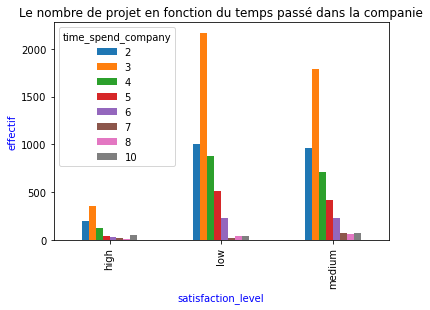

In [66]:
df_st.plot(kind='bar')
plt.title("Le nombre de projet en fonction du temps passé dans la companie")
plt.xlabel('satisfaction_level', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

In [67]:
#tableau de contingence entre "work_accident" et "job"
df_wj= pd.crosstab(bidata.work_accident, bidata.job)
df_wj

job,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
work_accident,,,,,,,,,,
0,741,422,441,426,359,494,497,2418,1231,1544
1,111,87,61,68,74,89,89,398,237,264


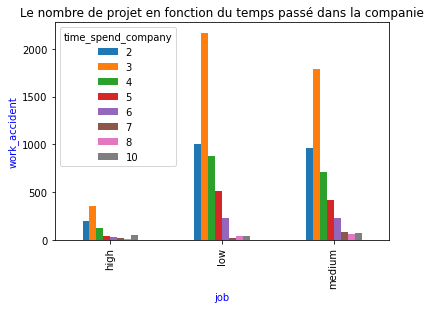

In [68]:
df_st.plot(kind='bar')
plt.title("Le nombre de projet en fonction du temps passé dans la companie")
plt.xlabel('job', color = 'blue')
plt.ylabel('work_accident', color = 'blue')
plt.show()

In [69]:
#tableau de contingence entre "promotion_last_5years" et "time_spend_company"
df_pt= pd.crosstab(bidata.promotion_last_5years, bidata.time_spend_company)
df_pt

time_spend_company,2,3,4,5,6,7,8,10
promotion_last_5years,,,,,,,,
0,2139,4225,1694,968,472,100,109,142
1,35,86,19,8,11,22,8,13


In [70]:
#tableau de contingence entre "salary" et "job"
df_sj= pd.crosstab(bidata.salary, bidata.job)
df_sj

job,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,60,36,46,28,158,53,39,182,97,129
low,423,243,241,225,122,279,293,1407,741,925
medium,369,230,215,241,153,251,254,1227,630,754


# III-Chapitre 3 : Modélisation des données

Maintenant que l'intrerprétation de nos données est plus claire nous allons les utiliser afin de répondre à la problématique : "Pourquoi les employés quittent-ils l'entreprise ?"

### A-Quel est le profil des collaborateurs qui vont quitter l'entreprise ?

Afin de determiner le profil des employés qui partent de l'entreprise, nous allons crée un tableau de bord sur power BI avec toutes les variables que nous allons comparer à la variable "left". Voila le tableau de bord Power bi que nous obtenons :



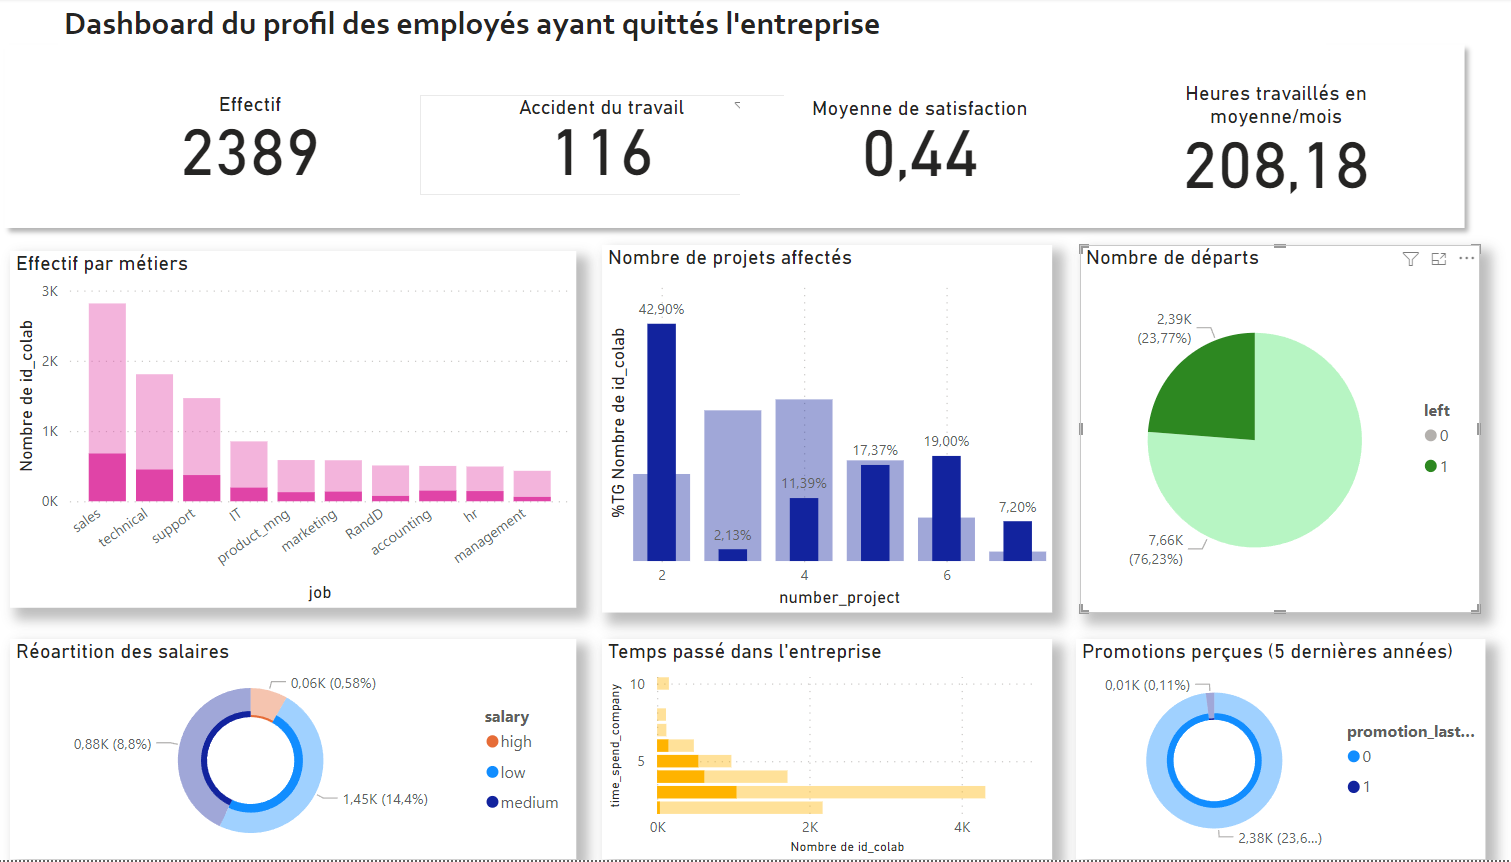

In [71]:
imdashboardglo = Image.open('Dashboard effectif left.png')
imdashboardglo

Afin de rendre le profil des employés quittant l'entreprise plus claire nous avons réaliser un persona sur canva, le voici :

Ensuite pour classer des différents critères qui jouent sur le dépard des collaborateurs, nous avons repris la heatmap crée un peu plus haut.

<function heatmap at 0x00000157B43F4B80>


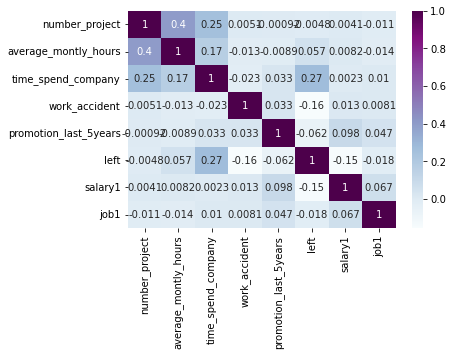

In [72]:
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
print(sns.heatmap)

Maintenant nous pouvons faire notre classement : 

- time_spend_company (0.27)
- average_montly_hours
- number_project
- promotion_last_5years
- job
- salary
- work_accident (-0,16)

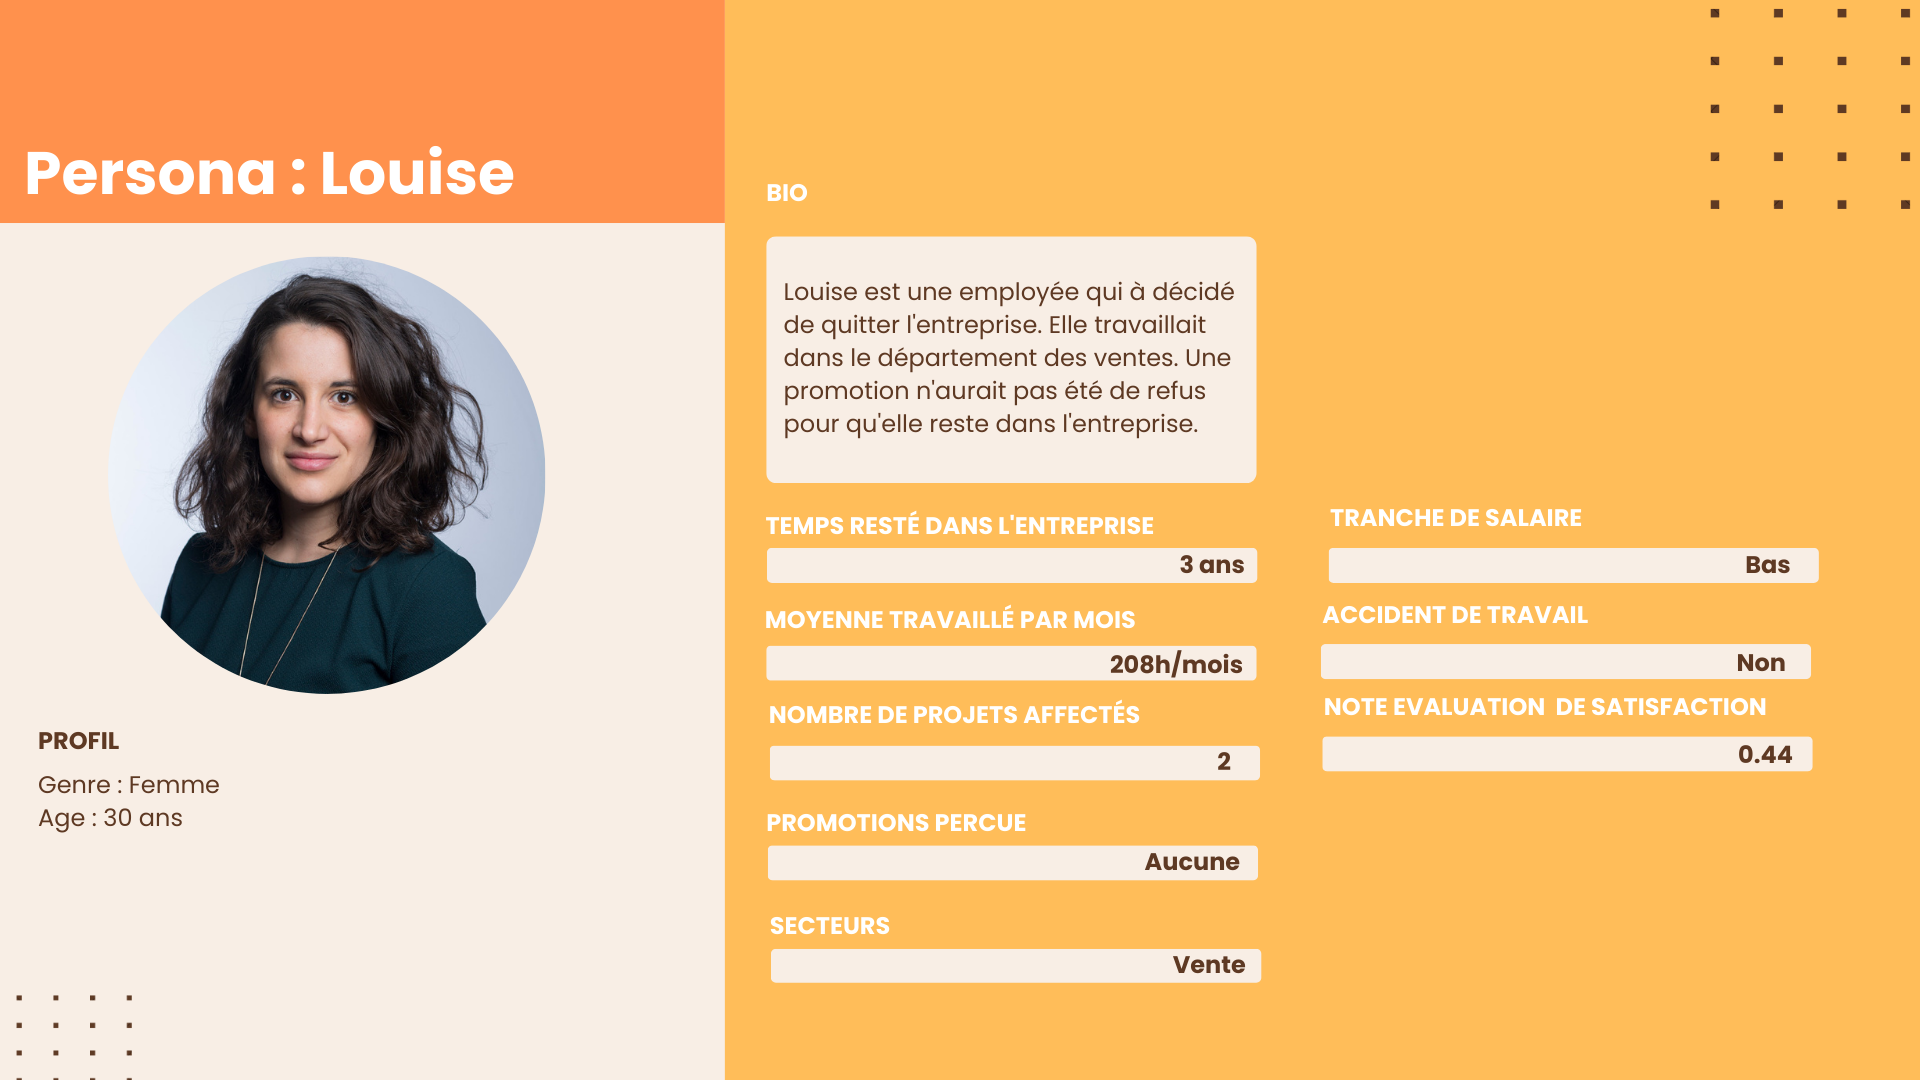

In [73]:
impersona = Image.open('persona.png')
impersona

### B- Quelle est la différence entre une régression linéaire et logistique

La régression logistique et la régression linéaire sont deux méthodes différentes de modélisation statistique utilisées pour prédire des valeurs continues ou discrètes.

La régression linéaire est une méthode de prédiction qui suppose une relation linéaire entre les variables indépendantes et la variable dépendante. Elle est utilisée pour prédire une variable continue en utilisant une fonction linéaire.

La régression logistique, d'autre part, est une méthode de classification utilisée pour prédire une variable dépendante binaire (par exemple, oui/non ou vrai/faux). La régression logistique utilise une fonction logistique pour modéliser la probabilité d'appartenance à une classe donnée. Cette fonction logistique transforme les prédictions continues de la régression linéaire en une probabilité comprise entre 0 et 1.

En résumé, la régression linéaire est utilisée pour les prédictions continues, tandis que la régression logistique est utilisée pour les prédictions de variables binaires.

### C-Pourquoi les collaborateurs quittent l'entreprise ?

Il est maintenant essentiel de déterminer qu'elles sont les variables qui sont le plus liés aux départs des salariés, afin de définir une stratégie pour les garder. Nous allons ici utiliser une fonction de régréssion logistique. 

Nous allons donc l'utiliser dans notre cas afin de hiérarchiser nos variables et savoir lesquelles sont les plus amenées à être les causes des départs.

Voici la régréssion logistique de notre dataframe : 

Pour pouvoir faire notre regression logistique, nous devons d'abord importer les packages que nous allons utiliser, puis définir les features et les cibles

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [75]:
newdata = bidata[bidata.columns[1:-4]]
newdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left
0,"0,72","0,87",5,223,5,0,0,sales,low,1
1,"0,37","0,52",2,159,3,0,0,sales,low,1
2,"0,1","0,77",6,247,4,0,0,sales,low,1
3,"0,89",1,5,224,5,0,0,sales,low,1
4,"0,42","0,53",2,142,3,0,0,sales,low,1


In [76]:
#Pour que cela marche, nous devons changer les "," en "."
newdata["satisfaction_level"] = newdata["satisfaction_level"].str.replace(",", ".")
newdata["satisfaction_level"] = newdata["satisfaction_level"].astype(float)

newdata["last_evaluation"]    = newdata["last_evaluation"].str.replace(",", ".")
newdata["last_evaluation"]    = newdata["last_evaluation"].astype(float)

C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\2208048325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["satisfaction_level"] = newdata["satisfaction_level"].str.replace(",", ".")
C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\2208048325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["satisfaction_level"] = newdata["satisfaction_level"].astype(float)
C:\Users\Emma\AppData\Local\Temp\ipykernel_5440\2208048325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [77]:
newdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left
0,0.72,0.87,5,223,5,0,0,sales,low,1
1,0.37,0.52,2,159,3,0,0,sales,low,1
2,0.10,0.77,6,247,4,0,0,sales,low,1
3,0.89,1.00,5,224,5,0,0,sales,low,1
4,0.42,0.53,2,142,3,0,0,sales,low,1


In [78]:
#nos features seront les X, et notre cible est y = "left" car c'est la variable à expliquer
X = newdata[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","work_accident","promotion_last_5years"]]
y = newdata.left

Une fois cela fait, nous pouvons faire notre regression logistique 
(Pour défnir les paramètres, nous nous sommes aidés de : 
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html )


In [79]:
logistic = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Définie les hyperparamètres à régler 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'max_iter' : [100, 200, 500, 1000],
              'multi_class' : ['auto', 'ovr', 'multinomial']}

#Créer l'objet de recherche de grille.
grid_search = GridSearchCV(logistic, param_grid)

#Ajuster la recherche de grille aux données.
grid_search.fit(X_train, y_train)

# Print le meilleur paramètre et le meilleur score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best parameters:  {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}
Best score:  0.7758706467661691


C:\Users\Emma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Emma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

In [80]:
best_settings = grid_search.best_params_
print(best_settings)

{'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}


In [81]:
## Créer un modèle de régression logistique et entrainer le modèle sur les données d'entraînement
logistic = LogisticRegression(C = best_settings["C"], penalty = best_settings["penalty"], max_iter = best_settings["max_iter"], multi_class = best_settings["multi_class"])
logistic.fit(X_train, y_train)

C:\Users\Emma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [82]:
# Afficher les coefficients
coef = logistic.coef_
print(coef)

[[-3.49593656  0.45895285 -0.25148551  0.00485783  0.20834317 -1.23029887
  -0.93407786]]


In [83]:
preds = logistic.predict(X_test)
accuracy_score(preds, y_test)

0.7707608155146694

Le score de précision de 0,77 dans la régression logistique est une mesure de la qualité des prédictions faites par le modèle. Il représente le pourcentage de prédictions correctes par rapport au nombre total de prédictions. Plus le score de précision est élevé, plus les prédictions du modèle sont précises. 
Une valeur de 0,77 signifie que 77% des prédictions faites par notre modèle sont correctes, ce qui peut être considéré comme une précision relativement élevée.

Cependant, il est important de noter que le score de précision n'est qu'un indicateur de la qualité du modèle et ne donne pas une vue complète de son ajustement aux données. Il peut être nécessaire de considérer d'autres mesures telles que le score R^2 ou les erreurs type pour évaluer complètement le modèle.

### D-Estimer la validité de votre modèle (R², p-value,...)

Il existe plusieurs mesures pour évaluer la validité d'un modèle de régression. Certaines des mesures les plus couramment utilisées comprennent :

R² (coefficient de détermination) : Cette mesure quantifie la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle. Plus R² est proche de 1, plus le modèle explique bien les variations de la variable dépendante.

Erreur quadratique moyenne (MSE) : Cette mesure quantifie la moyenne des erreurs de prédiction pour chaque point de données. Plus MSE est proche de zéro, plus le modèle est précis.

Test statistique F : Ce test statistique vérifie si les coefficients de régression sont significativement différents de zéro. Si le test est statistiquement significatif, cela signifie que le modèle a un effet significatif sur la variable dépendante.

Valeur p : Ce terme fait référence à la significativité statistique de chaque coefficient de régression. Si la valeur p est inférieure à un niveau de significativité (généralement 0,05), nous pouvons rejeter l'hypothèse nulle selon laquelle le coefficient est égal à zéro.

Courbe ROC (Receiver Operating Characteristic) : Cette courbe est utilisée pour évaluer les modèles de classification binaire (tels que la régression logistique). Elle quantifie la relation entre le taux de vrais positifs et le taux de faux positifs pour différents seuils de décision.

Il est important de noter que ces mesures ne peuvent pas être utilisées seules pour évaluer la validité d'un modèle. Il est souvent nécessaire de considérer un certain nombre de mesures pour obtenir une image complète de la qualité du modèle.

Le R^2 (coefficient de détermination) est un indicateur statistique utilisé pour mesurer la qualité de l'ajustement d'un modèle de régression à des données. Il représente la proportion de la variation totale de la variable cible qui peut être expliquée par les prédictions du modèle. Plus précisément, le R^2 varie entre 0 et 1, où un score de 1 indique un ajustement parfait et un score de 0 indique que le modèle ne peut pas expliquer la variation de la variable cible.

En général, plus le score R^2 est élevé, meilleur est l'ajustement du modèle aux données. Toutefois, un score R^2 élevé ne garantit pas nécessairement que le modèle est généralisable à de nouvelles données ou qu'il prévoit avec une grande précision.

Il se peut que le score R^2 soit négatif. Cela indique que le modèle de régression est en fait moins performant que les prédictions basées sur la moyenne simple de la variable cible. En d'autres termes, il signifie que les prédictions du modèle sont moins précises que les prédictions basées sur la moyenne de la variable cible.


In [84]:
#calcule de la mesure R2 score, ou R^2
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test, preds)

-0.25793578641424864

Le score de précision de 0,77 est une mesure de la proportion de prédictions correctes faites par notre modèle de régression logistique. Une valeur de 0,77 signifie que 77% des prédictions faites par notre modèle sont correctes, ce qui peut être considéré comme une précision relativement élevée.

Cependant, le score R^2 de -0,25 est une mesure de l'ajustement de votre modèle de régression logistique. Un score R^2 négatif indique que le modèle est peu adapté aux données et est pire que de simplement prédire la valeur moyenne de la variable cible.

Ainsi, bien que le score de précision de 0,77 puisse indiquer que le modèle fait des prédictions relativement précises, le score R^2 négatif suggère que le modèle de régression logistique peut ne pas être le meilleur modèle pour ajuster les données. Nous pouvons donc considérer d'essayer d'autres modèles ou d'ajuster l'ensemble de caractéristiques pour voir si nous pouvons améliorer le score R^2 et obtenir un meilleur ajustement global du modèle aux données.

# IV- Chapitre 4 : Tableau de bord et axes de stratégies

Afin que nos données soit facilement interprétable par le client, nous avons élaborer un nouveau tableau de bord power BI avec les facteurs principaux mis en évidence.

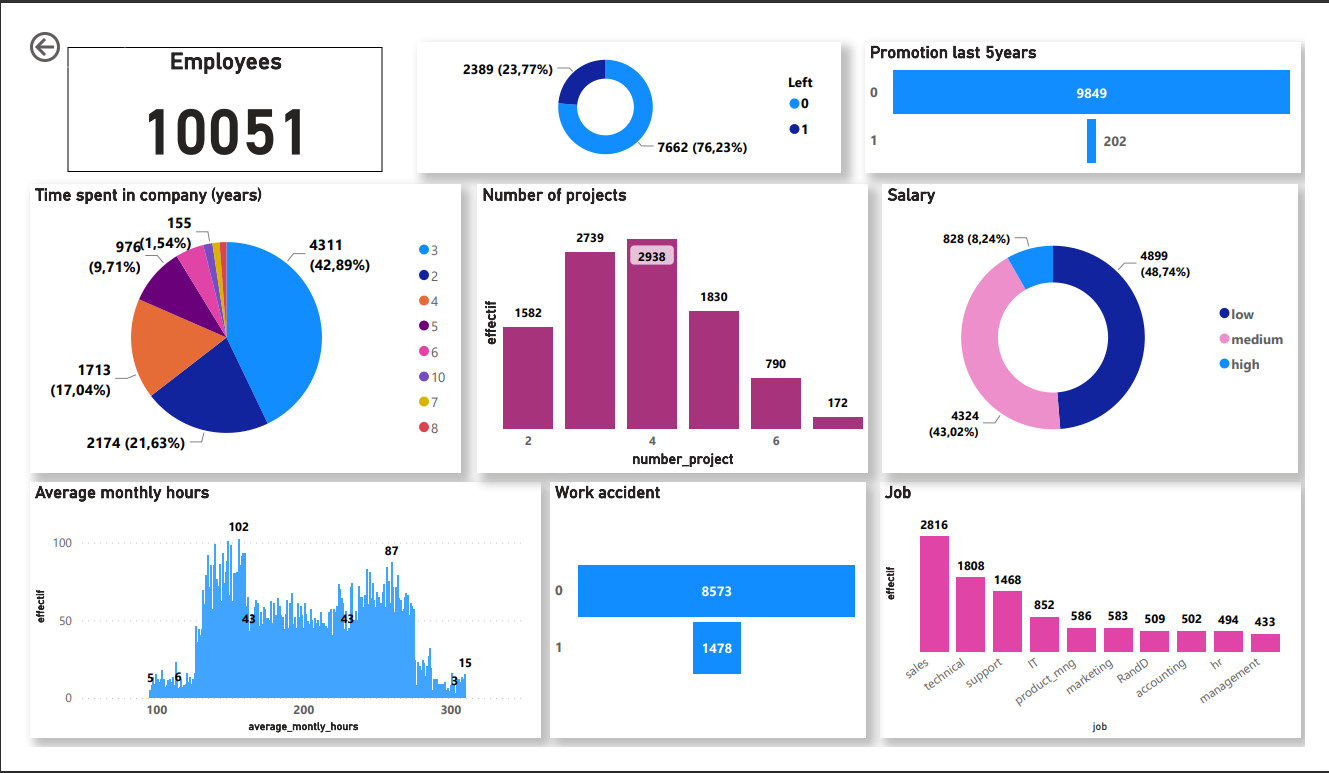

In [87]:
Dashboard1 = Image.open('dash1.png')
Dashboard1

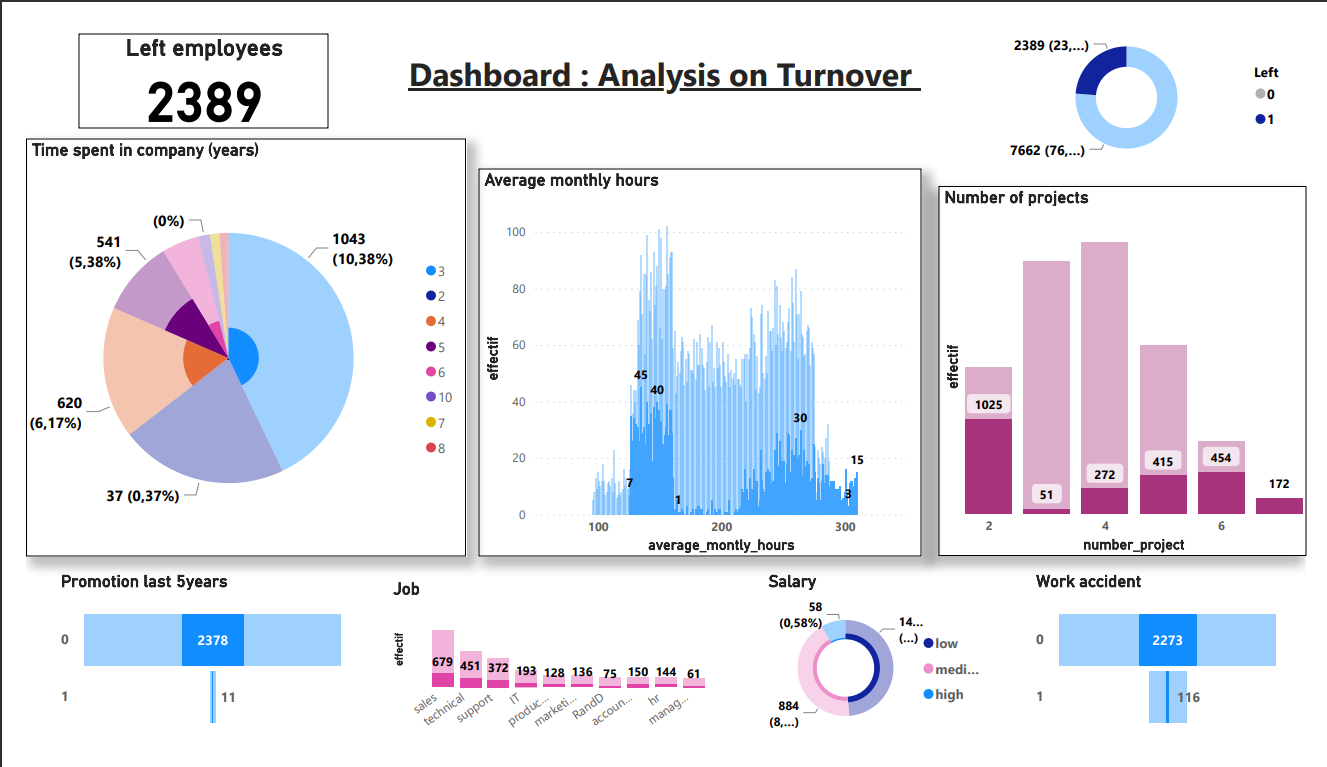

In [88]:
Dashboard2 = Image.open('dash2.png')
Dashboard2

Voici les différentes stratégies que nous proposons : 

    - Nous constatons que les employés quittent l'entreprise généralement au bout de 3 ans et qu'ils n'ont jamais eu de promotions. C'est pourquoi il faudrait peut être au bout de la 2 ème année donner une promotions obligatoire aux employés. 
    
    - Les employés qui quittent l'entreprise travaillent en général 208h par mois. La réevaluation du temps de travail peut être une bonne alternative comme par exemple la mise en place de "Nice friday"(jour imposé dans le mois ou les employés sont obligé de finir plus tôt)
    
    